# Simple plotting of 2-photon microsopy data
This script shows how the preprocessed data from 2-photon microsopy recording looks like. The preprocessing step includes tracing of the neural image and averaging over the pixel intensities that make up each neuron.

number of neurons recorded:  688
number of frames recorded:  2256


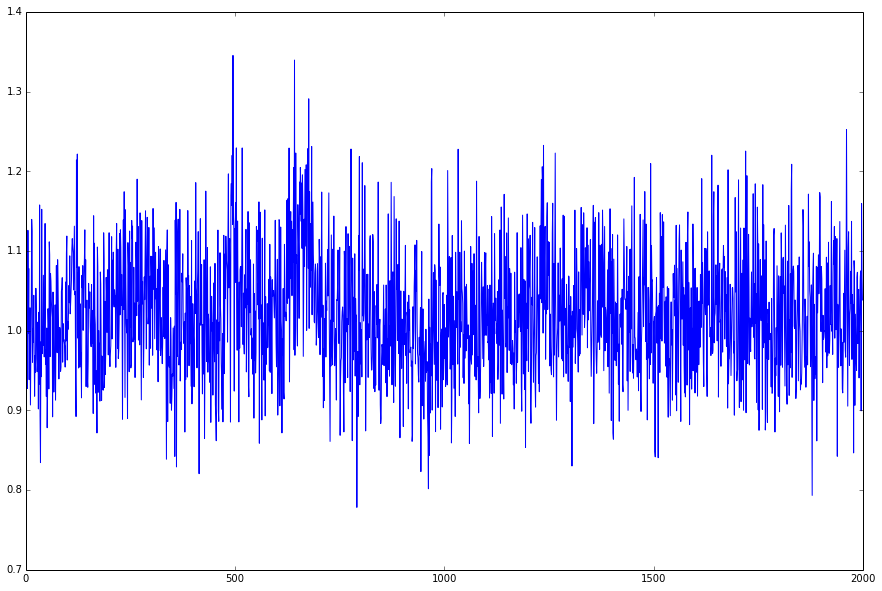

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
%matplotlib inline

# LOADING DATA #################################################################
# Load neuron data from pickled matrix
# (This only works for python 2, compatibility problems with pickled file for 3) 
trial = pickle.load(open("trial_day5.p", "r")) 

# trial can be accessed with trial[neuron_counter, frame_counter]
# counters start at 0
# eg: trial[1,2] gives the 2nd neuron's value during the 3rd time frame
#print trial[0, 0:len(trial[1])] # print data of neuron 1 for all time frames

n_neurons = len(trial) # total number of neurons
n_frames = len(trial[1]) # total number of frames
print "number of neurons recorded: ", n_neurons
print "number of frames recorded: ", n_frames

# how to access single neurons
n1 = trial[5, 0:n_frames] # neuron 1 from frame 0 to max frame number
#n2 = trial[2, 0:n_frames]
#n3 = trial[3, 0:n_frames]
#corr = np.corrcoef([n1,n2,n3,n4]) # corr for neurons 1 - 4

# how to access a bunch of neurons at once
n0_50 = trial[0:50, 0:n_frames]
n25_30 = trial[25:30, 0:n_frames]
# TODO: make sure you actaully have the same number of frames for each neuron

# PLOTTING #####################################################################
plt.figure(figsize=(15, 10))
plt.plot(n1[0:2000])
plt.show()

The plot above has 10% noise. Let's see how it lookes like if we average over 10 time frames to reduce noise.

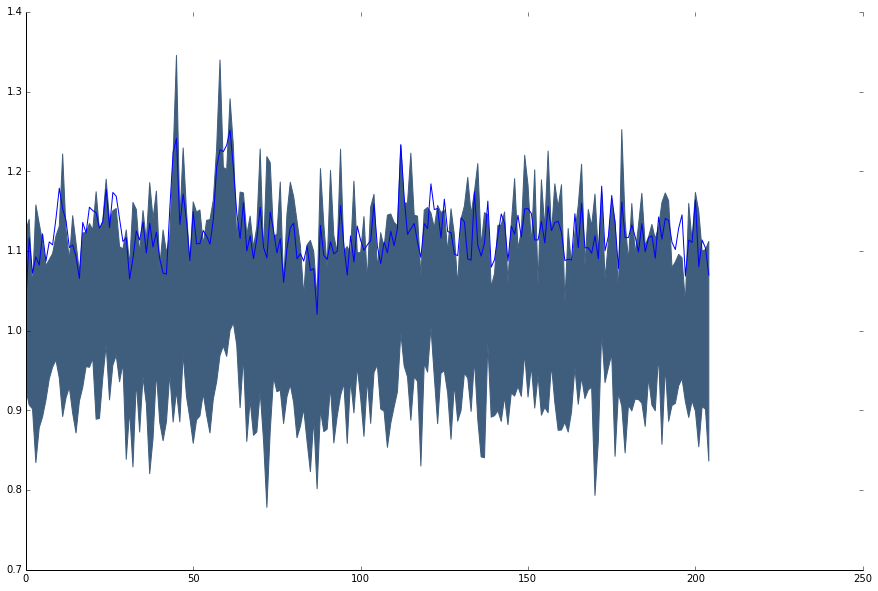

In [23]:
avg_10frames = []
min_10frames = []
max_10frames = []
start = 0
end = 10
while end < n_frames:
    data =  n1[start:end]
    minimum = min(data)
    min_10frames.append(minimum)
    maximum = max(data)
    max_10frames.append(maximum)
    avrg = sum(n1[start:end])/10
    avg_10frames.append(avrg)
    start = end
    end = end+11

# PLOTTING #######################
plt.figure(figsize=(15, 10))

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
  
ax.fill_between(range(len(avg_10frames)), min_10frames,  
                 max_10frames, color="#3F5D7D")
ax.plot(avg_10frames)
plt.show()